<a href="https://colab.research.google.com/github/AnanLu/hydrocode/blob/main/Q1/1_advection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
#grid for space
Ngrid = 50
#grid for time
Nsteps = 1500

#arbitrary dt and dx
dt = 1
dx = 1

#coefficient for advection
v = -0.1 #from ps5 statement
alpha = v*dt/2/dx

#set-up initial condition
x = np.arange(Ngrid)*dx

f1 = np.copy(x)*1./Ngrid
f2 = np.copy(x)*1./Ngrid

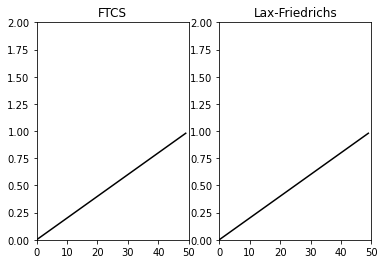

In [ ]:
#set-up plot

fig, axes = pl.subplots(1,2)
axes[0].set_title('FTCS')
axes[1].set_title('Lax-Friedrichs')

axes[0].plot(x,f1,'k-')
axes[1].plot(x,f2,'k-')

for ax in axes:
    ax.set_xlim([0,Ngrid])
    ax.set_ylim([0,2])

line1, = axes[0].plot([], [], 'ro', lw=2)
line2, = axes[1].plot([], [], 'ro', lw=2)

In [ ]:
# initialization function: set-up initial function for animation
def init():

    x = np.arange(Ngrid)*dx

    f1 = np.copy(x)*1./Ngrid
    f2 = np.copy(x)*1./Ngrid
    line1.set_data(x, f1)
    line2.set_data(x, f2)
    return (line1, line2)

In [ ]:
# animation function: 
#this is basically a for loop updated in the animation function
def animate(i):

    #FTC method
    f1[1:Ngrid-1] = f1[1:Ngrid-1] - alpha*(f1[2:]-f1[:Ngrid-2])

    #Lax-Friedrichs method
    f2[1:Ngrid-1] = 0.5*(f2[2:] + f2[:Ngrid-2] - alpha*(f2[2:]-f2[:Ngrid-2]))

    line1.set_data(x, f1)
    line2.set_data(x, f2)
    return (line1, line2)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
# frames=Nsteps is the number of time steps
# interval is time delay in milisecond
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nsteps, interval=50, blit=True)

In [ ]:
# run the animation code and can be saved as mp4
HTML(anim.to_html5_video())